# Performing Data Quality checks on Equities data

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
#equities = pd.read_csv('clean_trade.csv', dtype = str)
equities = pd.read_csv('dummy_trade.csv', dtype = str)

In [4]:
equities.head()

DISSEMINATION_ID ORIGINAL_DISSEMINATION_ID ACTION  EXECUTION_TIMESTAMP  \
0         82025760                       NaN    NEW  2018-03-16T06:57:31   
1         82025761                       NaN    NEW  2018-03-16T06:57:44   
2         82025762                       NaN    NEW  2018-03-16T06:57:43   
3         82025763                       NaN    NEW  2018-03-16T06:57:45   
4         82025764                       NaN    NEW  2018-03-16T06:57:45   

  CLEARED INDICATION_OF_COLLATERALIZATION INDICATION_OF_END_USER_EXCEPTION  \
0       U                              PC                              NaN   
1       U                              PC                              NaN   
2       U                              PC                              NaN   
3       U                              PC                              NaN   
4       U                              PC                              NaN   

  INDICATION_OF_OTHER_PRICE_AFFECTING_TERM  \
0                                        N   
1                                        N   
2                                        N   
3                                        N   
4                                        N   

  BLOCK_TRADES_AND_LARGE_NOTIONAL_OFF-FACILITY_SWAPS EXECUTION_VENUE  \
0                                                  N             OFF   
1                                                  N             OFF   
2                                                  N             OFF   
3                                                  N             OFF   
4                                                  N             OFF   

        ...       OPTION_TYPE OPTION_FAMILY OPTION_CURRENCY OPTION_PREMIUM  \
0       ...               NaN           NaN             NaN            NaN   
1       ...               NaN           NaN             NaN            NaN   
2       ...               NaN           NaN             NaN            NaN   
3       ...               NaN           NaN             NaN            NaN   
4       ...               NaN           NaN             NaN            NaN   

  OPTION_LOCK_PERIOD OPTION_EXPIRATION_DATE PRICE_NOTATION2_TYPE  \
0                NaN                    NaN                  NaN   
1                NaN                    NaN                  NaN   
2                NaN                    NaN                  NaN   
3                NaN                    NaN                  NaN   
4                NaN                    NaN                  NaN   

  PRICE_NOTATION2 PRICE_NOTATION3_TYPE PRICE_NOTATION3  
0             NaN                  NaN             NaN  
1             NaN                  NaN             NaN  
2             NaN                  NaN             NaN  
3             NaN                  NaN             NaN  
4             NaN                  NaN             NaN  

[5 rows x 44 columns]

In [5]:
equities.describe()

DISSEMINATION_ID ORIGINAL_DISSEMINATION_ID   ACTION  \
count           1023389                     89183  1023389   
unique          1022505                     58515        3   
top            82179278                  82671767      NEW   
freq                  2                         2   934206   

        EXECUTION_TIMESTAMP  CLEARED INDICATION_OF_COLLATERALIZATION  \
count               1023389  1023389                         1023389   
unique               159837        2                               4   
top     2016-04-06T16:00:01        U                              PC   
freq                   5720  1023375                          684189   

       INDICATION_OF_END_USER_EXCEPTION  \
count                             18500   
unique                                1   
top                                   N   
freq                              18500   

       INDICATION_OF_OTHER_PRICE_AFFECTING_TERM  \
count                                   1023389   
unique                                        2   
top                                           N   
freq                                    1012471   

       BLOCK_TRADES_AND_LARGE_NOTIONAL_OFF-FACILITY_SWAPS EXECUTION_VENUE  \
count                                             1023389          995600   
unique                                                  2               2   
top                                                     N             OFF   
freq                                              1023383          994638   

             ...        OPTION_TYPE OPTION_FAMILY OPTION_CURRENCY  \
count        ...                899           915            1092   
unique       ...                  2             2               6   
top          ...                 C-            EU             USD   
freq         ...                625           829             856   

        OPTION_PREMIUM OPTION_LOCK_PERIOD  OPTION_EXPIRATION_DATE  \
count             1090                713                     854   
unique             480                 87                     151   
top                  0         14/12/2020              15/06/2018   
freq               337                 80                     101   

       PRICE_NOTATION2_TYPE PRICE_NOTATION2 PRICE_NOTATION3_TYPE  \
count                490731          490390               382440   
unique                   50          101315                    2   
top            Basis points               0           Percentage   
freq                 339574          177658               382427   

        PRICE_NOTATION3  
count            382427  
unique               64  
top                   0  
freq             173249  

[4 rows x 44 columns]

In [6]:
equities.columns

Index(['DISSEMINATION_ID', 'ORIGINAL_DISSEMINATION_ID', 'ACTION',
       'EXECUTION_TIMESTAMP', 'CLEARED', 'INDICATION_OF_COLLATERALIZATION',
       'INDICATION_OF_END_USER_EXCEPTION',
       'INDICATION_OF_OTHER_PRICE_AFFECTING_TERM',
       'BLOCK_TRADES_AND_LARGE_NOTIONAL_OFF-FACILITY_SWAPS', 'EXECUTION_VENUE',
       'EFFECTIVE_DATE', 'END_DATE', 'DAY_COUNT_CONVENTION',
       'SETTLEMENT_CURRENCY', 'ASSET_CLASS',
       'SUB-ASSET_CLASS_FOR_OTHER_COMMODITY', 'TAXONOMY',
       'PRICE_FORMING_CONTINUATION_DATA', 'UNDERLYING_ASSET_1',
       'UNDERLYING_ASSET_2', 'PRICE_NOTATION_TYPE', 'PRICE_NOTATION',
       'ADDITIONAL_PRICE_NOTATION_TYPE', 'ADDITIONAL_PRICE_NOTATION',
       'NOTIONAL_CURRENCY_1', 'NOTIONAL_CURRENCY_2',
       'ROUNDED_NOTIONAL_AMOUNT_1', 'ROUNDED_NOTIONAL_AMOUNT_2',
       'PAYMENT_FREQUENCY_1', 'PAYMENT_FREQUENCY_2', 'RESET_FREQUENCY_1',
       'RESET_FREQUENCY_2', 'EMBEDED_OPTION', 'OPTION_STRIKE_PRICE',
       'OPTION_TYPE', 'OPTION_FAMILY', 'OPTION_CURRENCY

## Accuracy check

Def: The degree to which data correctly describes the "real world" object or event
being described

In this case, we know that the data represents trades under the Equities asset class, so we should expect to see that all values under the feature 'ASSET_CLASS' will be Equities.

In [7]:
equities.ASSET_CLASS.value_counts()

EQ      1022167
FID         718
Cash        419
Name: ASSET_CLASS, dtype: int64

In [8]:
acc = sum(equities.ASSET_CLASS == 'EQ')/len(equities) * 100
acc

99.880592814657959

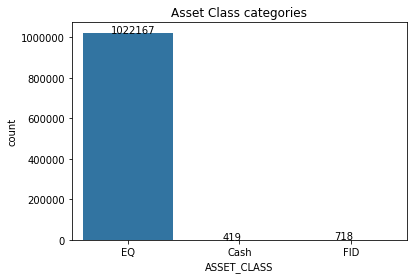

In [39]:
ax = sns.countplot(x='ASSET_CLASS', data=equities)
ax.set_title('Asset Class categories')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+50))
plt.show()

In [42]:
selected_columns = ['DISSEMINATION_ID','EXECUTION_TIMESTAMP','ASSET_CLASS','PRICE_NOTATION','ROUNDED_NOTIONAL_AMOUNT_1','TAXONOMY']
equities[equities.ASSET_CLASS != 'EQ'][selected_columns].head()

DISSEMINATION_ID  EXECUTION_TIMESTAMP ASSET_CLASS PRICE_NOTATION  \
8946          82013014  2018-03-16T01:07:54        Cash             50   
11166         82017532  2018-03-15T05:32:25        Cash             14   
11167         81921997  2018-03-16T03:47:23        Cash             14   
32545         82038146  2018-03-15T18:03:30        Cash         -0.007   
32546         82038147  2018-03-15T18:03:30        Cash         -0.007   

      ROUNDED_NOTIONAL_AMOUNT_1  \
8946                   26000000   
11166                       NaN   
11167                 160000000   
32545                 180000000   
32546                  91000000   

                                                TAXONOMY  
8946   Equity:Swap:PriceReturnBasicPerformance:Single...  
11166  Equity:Swap:PriceReturnBasicPerformance:Single...  
11167  Equity:Swap:PriceReturnBasicPerformance:Single...  
32545  Equity:Swap:PriceReturnBasicPerformance:Single...  
32546  Equity:Swap:PriceReturnBasicPerformance:Single...

In [43]:
equities[equities.ASSET_CLASS != 'EQ'][selected_columns].describe()

DISSEMINATION_ID  EXECUTION_TIMESTAMP ASSET_CLASS PRICE_NOTATION  \
count              1222                 1222        1137           1222   
unique             1222                  561           2             46   
top            83198555  2018-04-05T16:49:21         FID              0   
freq                  1                   24         718            818   

       ROUNDED_NOTIONAL_AMOUNT_1  \
count                       1194   
unique                       314   
top                      2000000   
freq                          88   

                                                 TAXONOMY  
count                                                1222  
unique                                                  4  
top     Equity:Swap:PriceReturnBasicPerformance:Single...  
freq                                                  640

As we can see, the dataset contains 2 additional categories for Asset Class (namely FID and Cash), which violates accuracy rules.

## Consistency

Def: The absence of difference, when comparing two or more representations of a
thing against a definition.

Assessment of things across multiple data sets and/or assessment of values or
formats across data items, records, data sets and databases. 

Here we will focus on consistency over multiple features in individual records

In [25]:
equities.EXECUTION_TIMESTAMP.head()

0    2018-03-16T06:57:31
1    2018-03-16T06:57:44
2    2018-03-16T06:57:43
3    2018-03-16T06:57:45
4    2018-03-16T06:57:45
Name: EXECUTION_TIMESTAMP, dtype: object

In [26]:
datetimes = pd.to_datetime(equities.EXECUTION_TIMESTAMP)
datetimes.head()

0   2018-03-16 06:57:31
1   2018-03-16 06:57:44
2   2018-03-16 06:57:43
3   2018-03-16 06:57:45
4   2018-03-16 06:57:45
Name: EXECUTION_TIMESTAMP, dtype: datetime64[ns]

In [27]:
datetime.datetime.now()

datetime.datetime(2018, 5, 3, 11, 34, 56, 164132)

Checking for Execution Timestamp values that occur in the future.

In [45]:
equities[datetimes > datetime.datetime.now()][selected_columns].head()

DISSEMINATION_ID  EXECUTION_TIMESTAMP ASSET_CLASS PRICE_NOTATION  \
27108         82034461  2018-12-15T10:05:57          EQ        1429.21   
27883         82033589  2018-12-15T10:05:58          EQ        2042.58   
27890         82033597  2018-12-15T10:05:59          EQ        1313.95   
28270         82038645  2018-12-01T09:02:48          EQ             35   
32739         82038200  2018-12-01T09:02:49          EQ             35   

      ROUNDED_NOTIONAL_AMOUNT_1  \
27108                   2000000   
27883                   1000000   
27890                    740000   
28270                     69000   
32739                      2100   

                                                TAXONOMY  
27108  Equity:Option:PriceReturnBasicPerformance:Sing...  
27883  Equity:Option:PriceReturnBasicPerformance:Sing...  
27890  Equity:Option:PriceReturnBasicPerformance:Sing...  
28270  Equity:Swap:PriceReturnBasicPerformance:Single...  
32739  Equity:Swap:PriceReturnBasicPerformance:Single...

In [152]:
dates = datetimes.dt.date
index1 = dates[(dates<datetime.date(2018,3,16))].index;
index2 = dates[(dates>datetime.date(2018,4,15))].index;
full_index = sorted(index1.append(index2))

In [151]:
equities.iloc[full_index].head()

DISSEMINATION_ID ORIGINAL_DISSEMINATION_ID  ACTION  EXECUTION_TIMESTAMP  \
820          82025676                  81822776  CANCEL  2018-03-14T01:22:42   
1944         82030631                       NaN     NEW  2018-03-15T23:02:15   
1946         82030633                       NaN     NEW  2018-03-15T23:57:08   
1947         82030634                       NaN     NEW  2018-03-15T23:01:30   
2125         82030660                       NaN     NEW  2018-03-15T23:01:30   

     CLEARED INDICATION_OF_COLLATERALIZATION INDICATION_OF_END_USER_EXCEPTION  \
820        U                              PC                              NaN   
1944       U                              PC                              NaN   
1946       U                              PC                              NaN   
1947       U                              PC                              NaN   
2125       U                              PC                              NaN   

     INDICATION_OF_OTHER_PRICE_AFFECTING_TERM  \
820                                         N   
1944                                        N   
1946                                        N   
1947                                        N   
2125                                        N   

     BLOCK_TRADES_AND_LARGE_NOTIONAL_OFF-FACILITY_SWAPS EXECUTION_VENUE  \
820                                                   N             NaN   
1944                                                  N             OFF   
1946                                                  N             OFF   
1947                                                  N             OFF   
2125                                                  N             OFF   

         ...     OPTION_FAMILY OPTION_CURRENCY OPTION_PREMIUM  \
820      ...               NaN             NaN            NaN   
1944     ...               NaN             NaN            NaN   
1946     ...               NaN             NaN            NaN   
1947     ...               NaN             NaN            NaN   
2125     ...               NaN             NaN            NaN   

     OPTION_LOCK_PERIOD OPTION_EXPIRATION_DATE PRICE_NOTATION2_TYPE  \
820                 NaN                    NaN         Basis points   
1944                NaN                    NaN                  NaN   
1946                NaN                    NaN                  NaN   
1947                NaN                    NaN                  NaN   
2125                NaN                    NaN                  NaN   

     PRICE_NOTATION2 PRICE_NOTATION3_TYPE PRICE_NOTATION3        Date  
820                0           Percentage               0  2018-03-14  
1944             NaN                  NaN             NaN  2018-03-15  
1946             NaN                  NaN             NaN  2018-03-15  
1947             NaN                  NaN             NaN  2018-03-15  
2125             NaN                  NaN             NaN  2018-03-15  

[5 rows x 45 columns]

In [153]:
equities.iloc[full_index].describe()

DISSEMINATION_ID ORIGINAL_DISSEMINATION_ID  ACTION  \
count             34105                     29297   34105   
unique            34074                     15370       3   
top            82217464                  51474391  CANCEL   
freq                  2                         2   15340   

        EXECUTION_TIMESTAMP CLEARED INDICATION_OF_COLLATERALIZATION  \
count                 34105   34105                           34105   
unique                 7467       2                               4   
top     2016-04-06T16:00:01       U                              PC   
freq                   5720   34100                           29952   

       INDICATION_OF_END_USER_EXCEPTION  \
count                               471   
unique                                1   
top                                   N   
freq                                471   

       INDICATION_OF_OTHER_PRICE_AFFECTING_TERM  \
count                                     34105   
unique                                        2   
top                                           N   
freq                                      33711   

       BLOCK_TRADES_AND_LARGE_NOTIONAL_OFF-FACILITY_SWAPS EXECUTION_VENUE  \
count                                               34105           33243   
unique                                                  2               2   
top                                                     N             OFF   
freq                                                34099           33167   

           ...     OPTION_FAMILY OPTION_CURRENCY OPTION_PREMIUM  \
count      ...               227             242            242   
unique     ...                 2               3             76   
top        ...                EU             USD              0   
freq       ...               197             232             50   

        OPTION_LOCK_PERIOD OPTION_EXPIRATION_DATE  PRICE_NOTATION2_TYPE  \
count                  204                    223                 11942   
unique                  28                     28                    31   
top             14/12/2020             14/12/2020                   USD   
freq                    80                     80                  8160   

       PRICE_NOTATION2 PRICE_NOTATION3_TYPE PRICE_NOTATION3        Date  
count            11867                 8643            8630       34105  
unique            5703                    2              14         899  
top                  0           Percentage               1  2016-04-06  
freq               254                 8630            4113        5720  

[4 rows x 45 columns]

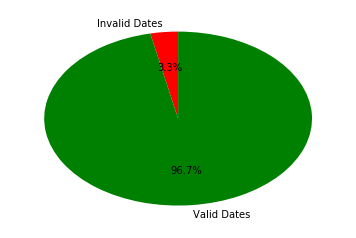

In [156]:
num_wrong_dates = len(full_index)
num_wrong_dates
slices_dates = [num_wrong_dates, len(equities) - num_wrong_dates]
slices_dates
activities = ['Invalid Dates', 'Valid Dates']
colors = ['r','g']
plt.pie(slices_dates,labels=activities,colors = colors,startangle=90, autopct='%.1f%%')
plt.show()

In [9]:
equities['Month'] = datetimes.dt.month

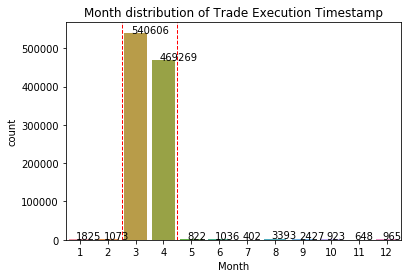

In [11]:
ax = sns.countplot(x = 'Month', data=equities)
ax.set_title('Month distribution of Trade Execution Timestamp')
plt.axvline(1.5, color='r', linestyle='dashed', linewidth=1)
plt.axvline(3.5, color='r', linestyle='dashed', linewidth=1)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+50))
plt.show()

In [166]:
numeric = ['PRICE_NOTATION','ADDITIONAL_PRICE_NOTATION','ROUNDED_NOTIONAL_AMOUNT_1','ROUNDED_NOTIONAL_AMOUNT_2','OPTION_STRIKE_PRICE','OPTION_PREMIUM','PRICE_NOTATION2','PRICE_NOTATION3']

for i in numeric:
    if equities[i].dtype == 'O' or equities[i].dtype == 'S':
        try:
            data[i] = pd.to_numeric(equities[i].str.replace(',', '').str.replace('+',''))
        except:
            print(i + ' contains some issues, explore further')

In [168]:
equities.PRICE_NOTATION.describe()

count    9.965920e+05
mean     1.420344e+10
std      3.748045e+12
min     -2.100000e+04
25%      3.938710e+00
50%      3.383116e+01
75%      2.952979e+03
max      1.000000e+15
Name: PRICE_NOTATION, dtype: float64

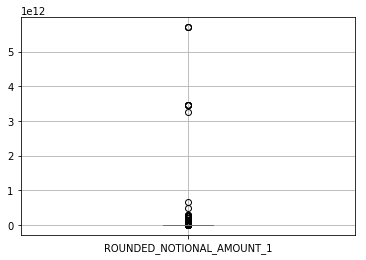

In [181]:
equities.boxplot(column='PRICE_NOTATION')
plt.show()

In [ ]:
equities.boxplot(column='ROUNDED_NOTIONAL_AMOUNT_1')
plt.show()

In [ ]:
equities.boxplot(column='ROUNDED_NOTIONAL_AMOUNT_1')
plt.show()